Anonymize with mondrian


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 15065.75it/s]


NCP score (lower is better): 0.271
CAVG score (near 1 is better): BEFORE: 0.100 || AFTER: 3.127
DM score (lower is better): BEFORE: 426009600 || AFTER: 1020236
Time execution: 48.955s
Anonymize with mondrian


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 27165.18it/s]


NCP score (lower is better): 0.277
CAVG score (near 1 is better): BEFORE: 0.091 || AFTER: 2.978
DM score (lower is better): BEFORE: 426009600 || AFTER: 1052602
Time execution: 45.184s
Anonymize with topdown


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1671/1671 [00:00<00:00, 33202.18it/s]


NCP score (lower is better): 0.257
CAVG score (near 1 is better): BEFORE: 0.100 || AFTER: 1.489
DM score (lower is better): BEFORE: 426009600 || AFTER: 403632
Time execution: 16.395s
Anonymize with topdown


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1530/1530 [00:00<00:00, 33433.29it/s]


NCP score (lower is better): 0.261
CAVG score (near 1 is better): BEFORE: 0.091 || AFTER: 1.459
DM score (lower is better): BEFORE: 426009600 || AFTER: 430760
Time execution: 17.813s


/var/folders/nt/_rylnbr93rx9mxvwv8nsm7980000gp/T/ipykernel_1502/4070910183.py:115: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  result = np.genfromtxt("metric_result", names = col, dtype = None)


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

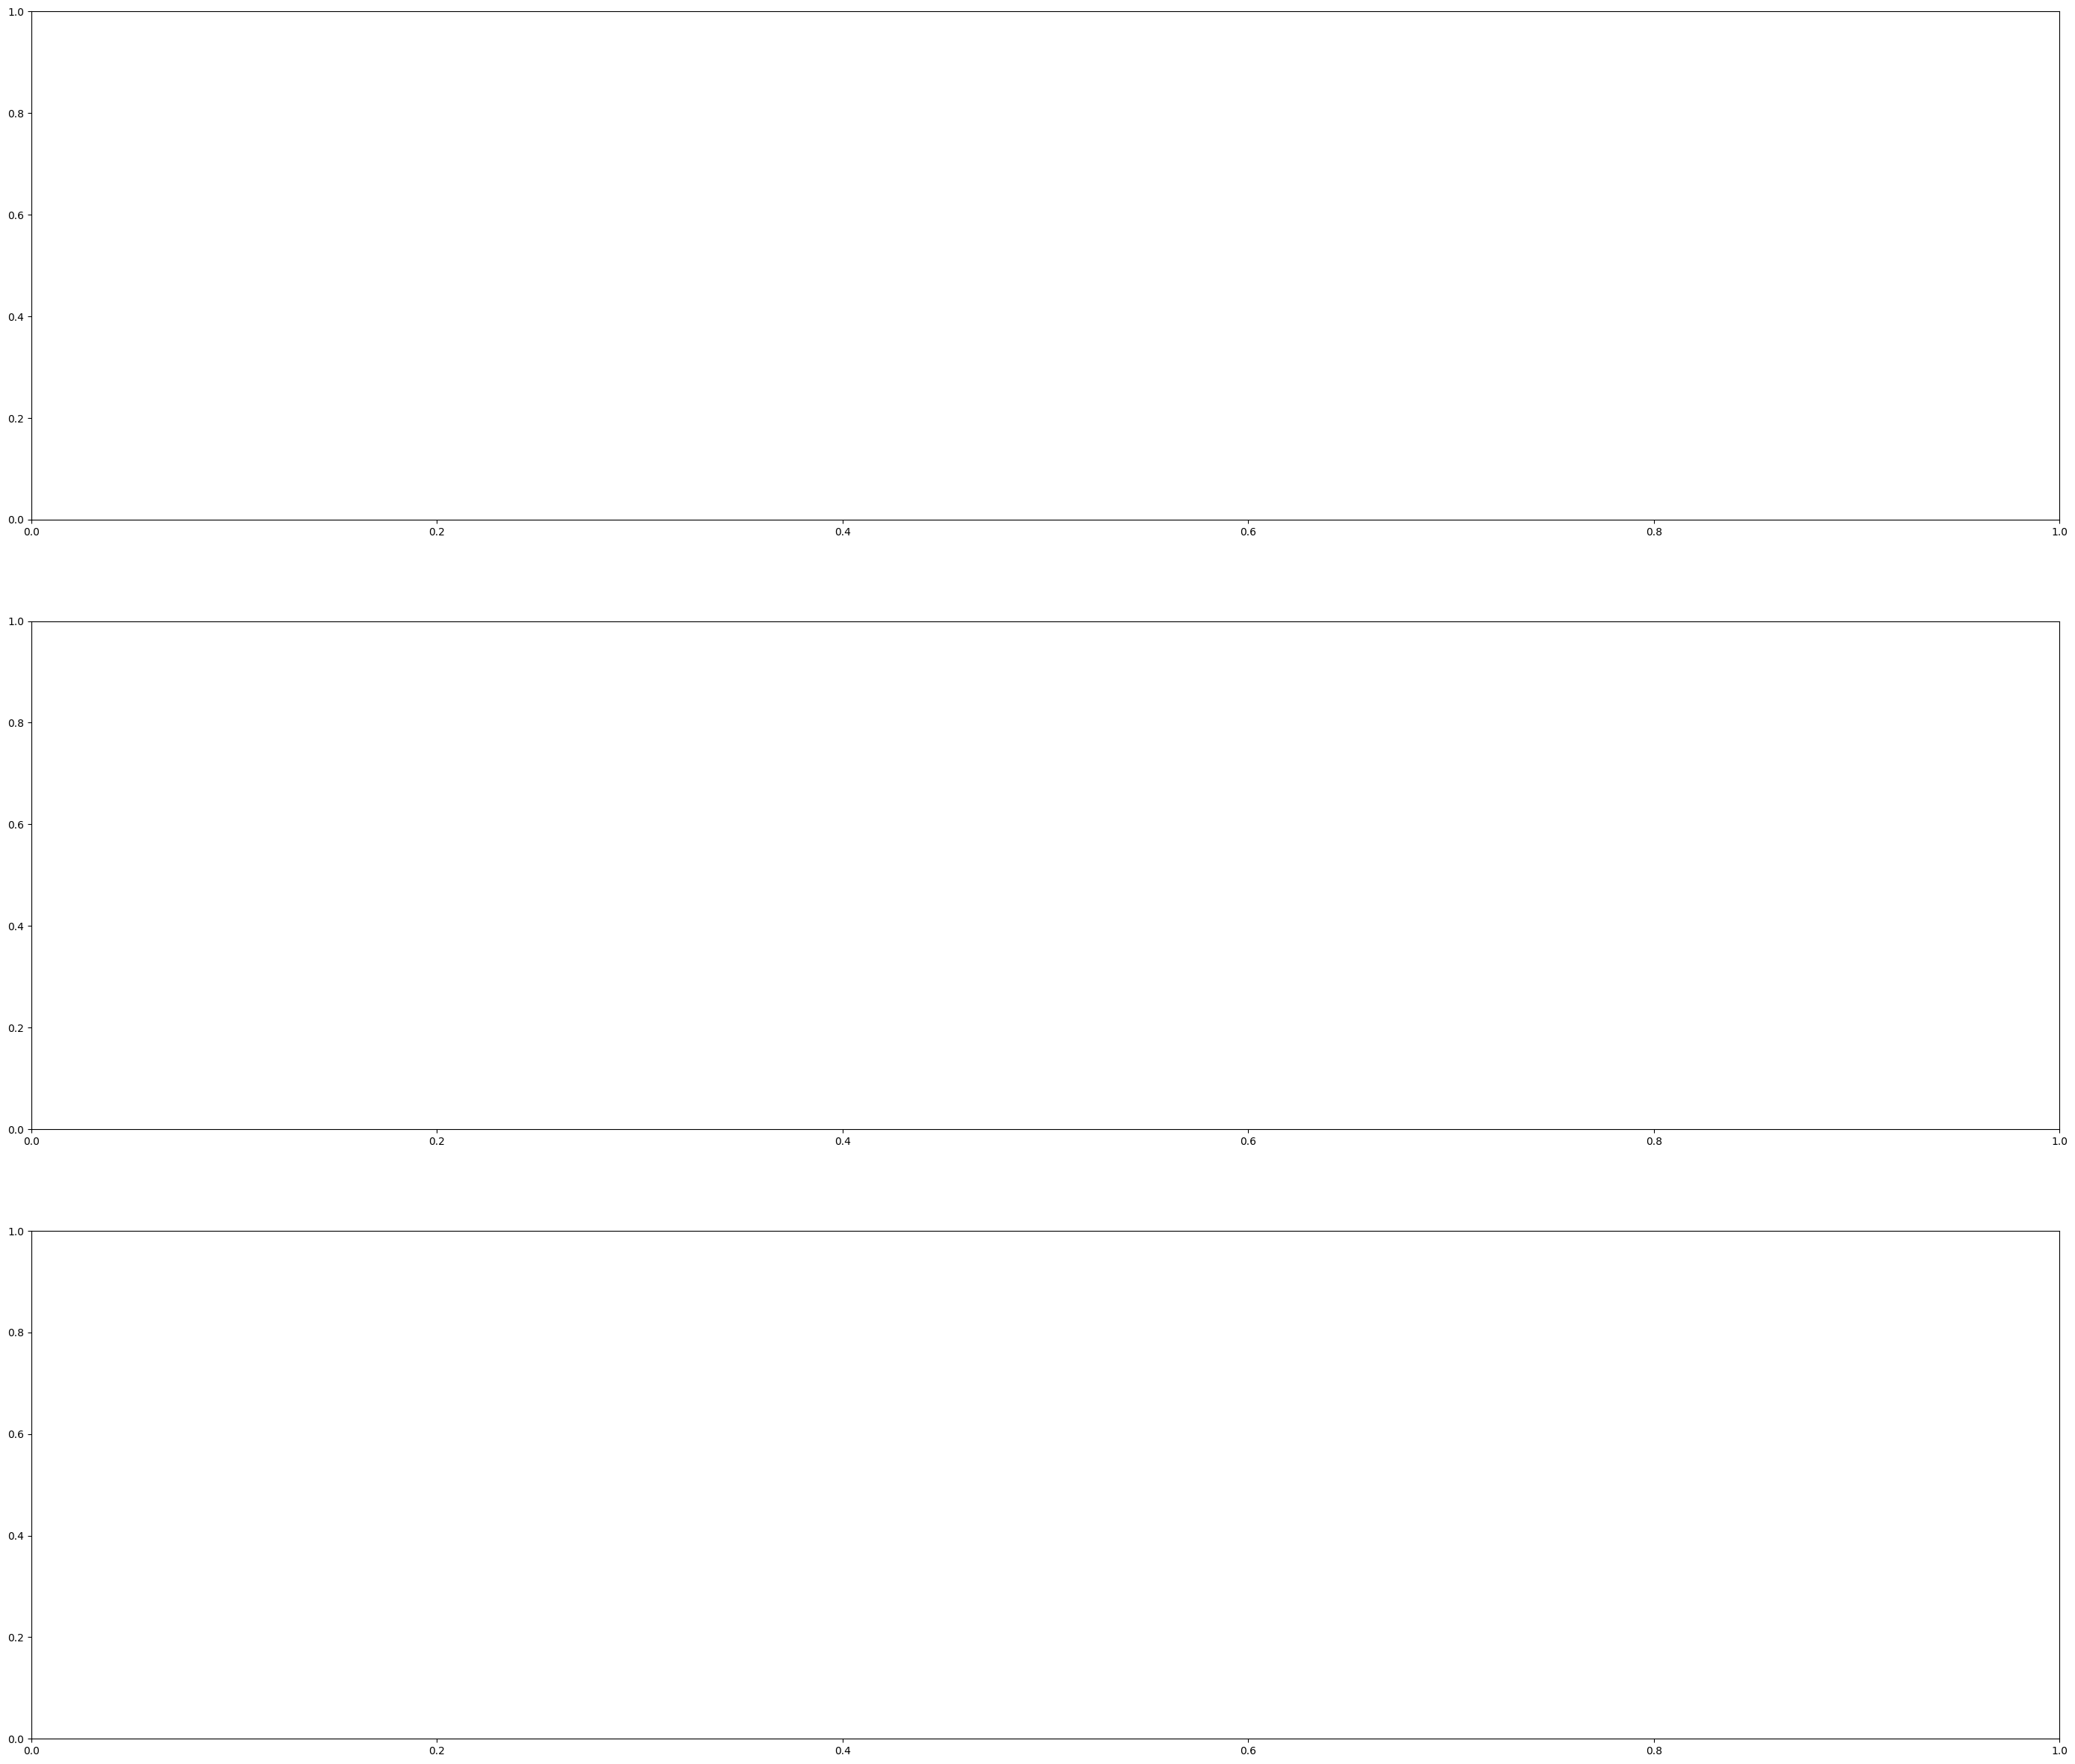

In [1]:

from operator import sub
import os
import numpy as np
import matplotlib.pyplot as plt
from argparse import Namespace

from anonymize import Anonymizer
from models import classifier_evaluation
from datasets import get_dataset_params
from algorithms import read_tree

methods = ['mondrian', 'topdown'] #['cluster', 'datafly']  'classic_mondrian',
dataset = ['cahousing']  # italia , 'cmc', 'mgm', 'informs' , 'adult'
k_array = [i for i in range(10, 12, 1)]

metrics = ['ncp', 'cav', 'dm']
ml_metrics = ['knn', 'svm', 'rf']
lcolors = ['orange', 'deepskyblue', 'limegreen', 'magenta']

metric_names = [
    'Normalized\nCertainty\n(lower is better)', 
    'Average\nEquivalence\n(lower is better)', 
    'Discernibility\nMetric\n(lower is better)']

ml_metric_names = [
    'KNN',
    'SVMs',
    'RFs'
]

def sub_plot(result, dataset, methods, metrics, label_x, label_y, figname):

    fig, axis = plt.subplots(nrows = len(metrics), ncols = len(dataset), figsize = (35, 30))
    
    for row, metric in enumerate(metrics):
        for col, data in enumerate(dataset):
            data = data.encode('utf-8')
            sub_data = result[ (data == result['data']) ]
            for i, method in enumerate(methods):
                method = method.encode('utf-8')
                sub = sub_data[ (method == sub_data['method'])]
                axis[row, col].plot(sub['k'], sub[metric], color = lcolors[i], label=sub['method'][0].decode('utf-8'))

    labels_handles = {
        label: handle for ax in fig.axes for handle, label in zip(*ax.get_legend_handles_labels())
    }

    fig.legend(
        labels_handles.values(),
        labels_handles.keys(),
        loc="upper center",
        fontsize=30,
        ncol=len(labels_handles.values()))

    for ax, col in zip(axis[0], label_x):
        ax.set_title(col.upper(), size=20)
    
    for ax in axis[-1]:
        ax.set_xlabel('k', size=20)

    for ax, row in zip(axis[:,0], label_y):
        ax.set_ylabel(row, size = 30)
        ax.get_yaxis().set_label_coords(-0.2, 0.5)
    
    plt.subplots_adjust(0.075, 0.05, 0.97, 0.95, 0.2, 0.25)
    plt.savefig(figname)
    plt.show()


def sub_plot_ml(result, dataset, methods, models, label_x, label_y, figname):

    fig, axis = plt.subplots(nrows = len(models), ncols = len(dataset), figsize = (35, 30))
    
    for col, model in enumerate(models):
        model = model.encode('utf-8')
        sub_data1 = result[(model == result['model'])] 
        for row, data in enumerate(dataset):
            data = data.encode('utf-8')
            sub_data2 = sub_data1[(data == sub_data1['data'])]

            for i, method in enumerate(methods):
                method = method.encode('utf-8')
                sub_data3 = sub_data2[(method == sub_data2['method'])]
                if i == 0:
                    # Baseline score
                    axis[col, row].plot(sub_data3['k'], sub_data3["ori_f1"], '--', color = 'black', label="Baseline")
                axis[col, row].plot(sub_data3['k'], sub_data3["anon_f1"], color = lcolors[i], label= sub_data3['method'][0].decode('utf-8'))
            
    labels_handles = {
        label: handle for ax in fig.axes for handle, label in zip(*ax.get_legend_handles_labels())
    }

    fig.legend(
        labels_handles.values(),
        labels_handles.keys(),
        loc="upper center",
        fontsize=30,
        ncol=len(labels_handles.values()))

    for ax, col in zip(axis[0], label_x):
        ax.set_title(col.upper(), size=20)
    
    for ax in axis[-1]:
        ax.set_xlabel('k', size=20)

    for ax, row in zip(axis[:,0], label_y):
        ax.set_ylabel(row, size = 30)
        ax.get_yaxis().set_label_coords(-0.2, 0.5)
    
    plt.subplots_adjust(0.075, 0.05, 0.97, 0.95, 0.2, 0.25)
    plt.savefig(figname)
    plt.show()

def plot_metric(col, dataset, methods, metrics, label_x, label_y, figname):
    result = np.genfromtxt("metric_result", names = col, dtype = None)
    sub_plot(result, dataset, methods, metrics, label_x, label_y, figname)

def plot_metric_ml(col, dataset, methods, models, label_x, label_y, figname):
    result = np.genfromtxt("ml_metric_result", names = col, dtype=None)
    sub_plot_ml(result, dataset, methods, models, label_x, label_y, figname)


def run_anon_data():

    output = open("metric_result", "w")

    for data in dataset:
        for method in methods:
            for k in k_array:
                args = Namespace()
                args.method = method
                args.dataset = data
                args.k = k
                anonymizer = Anonymizer(args)
                ncp, cav_b, cav_a, dm_b, dm_a = anonymizer.anonymize()
                result = f'{data} {method} {k} {ncp:.3f} {cav_a:.3f} {dm_a:.3f}'
                output.write(result + '\n')
    
    output.close()

def run_anon_data_ml():
    import pandas as pd
    data_path = './data'
    result_path = './results'
    output = open("ml_metric_result", "w")

    for data in dataset:
        gen_path = f'./data/{data}/hierarchies'
        data_params = get_dataset_params(data)
        QI_INDEX = data_params['qi_index']
        IS_CAT = data_params['is_category']
        HAS_HIERARCHIES = [True] * len(IS_CAT)
        ori_csv = os.path.join(data_path, data, f'{data}.csv')
        tmp_df = pd.read_csv(ori_csv, delimiter=';')
        ATT_NAMES = list(tmp_df.columns)
        ATT_TREES = read_tree(
                gen_path, 
                data, 
                ATT_NAMES, 
                QI_INDEX, 
                HAS_HIERARCHIES)
        train_index = os.path.join(data_path, data, f'{data}_train.txt')
        val_index = os.path.join(data_path, data, f'{data}_val.txt')
        for classifier_name in ml_metrics:
            ori_f1 = classifier_evaluation(classifier_name, ori_csv, train_index, val_index, QI_INDEX, IS_CAT)
            for method in methods:
                for k in k_array:
                    anon_csv = os.path.join(result_path, data, method, f'{data}_anonymized_{k}.csv')
                    tmp_att_trees = ATT_TREES
                    if method == 'classic_mondrian':
                        tmp_att_trees = None
                    anon_f1 = classifier_evaluation(
                        classifier_name, 
                        ori_csv, 
                        train_index, 
                        val_index, 
                        anon_csv=anon_csv,
                        qi_index=QI_INDEX, 
                        is_cat=IS_CAT,
                        att_trees=tmp_att_trees)

                    result = f'{data} {method} {k} {classifier_name} {ori_f1:.3f} {anon_f1:.3f}'
                    output.write(result + '\n')
    output.close()


if __name__ == '__main__':

    # Metric evaluation
    run_anon_data()
    plot_metric(
        col = ["data", "method", "k", "ncp", "cav", "dm"],
        metrics = metrics,
        dataset=dataset,
        methods=methods,
        label_x= dataset,
        label_y = metric_names,
        figname='./demo/metrics'
    )

    run_anon_data_ml()
    plot_metric_ml(
        col = ["data", "method", "k", "model" ,"ori_f1", "anon_f1"],
        dataset=dataset,
        methods=methods,
        models=ml_metrics,
        label_x= dataset,
        label_y = ml_metric_names,
        figname='./demo/metrics_ml'
    )